In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from colour import Color

mpl.rcParams['font.size'] = 100
sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

# MNIST

/home/canyon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


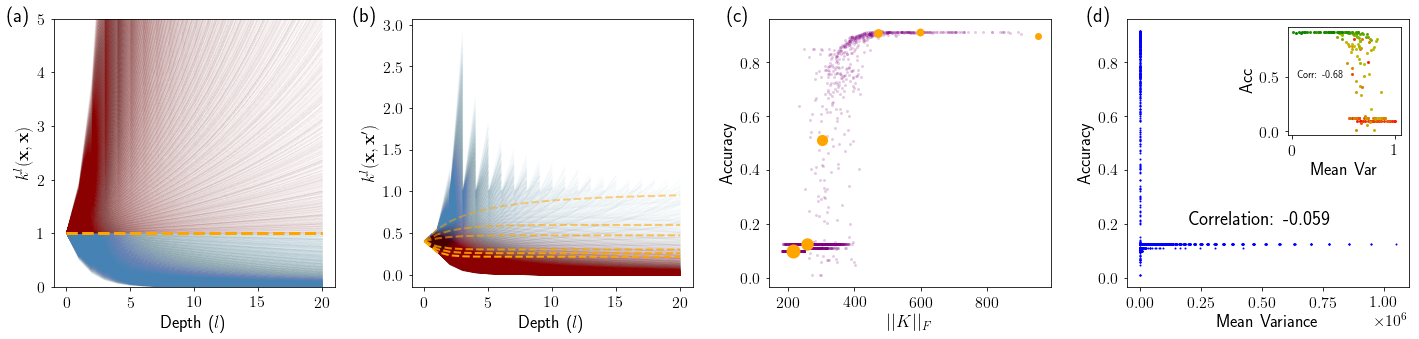

In [2]:
results_mnist = pd.read_csv("results/results20.csv", header=None)

var = np.array(results_mnist[8])
accs = np.array(results_mnist[7])
weight_var = np.array(results_mnist[2])
mu_2 = np.array(results_mnist[4])
nan_index = np.where(np.isnan(var))[0]
var = np.delete(var, nan_index)
acc = np.delete(np.array(accs), nan_index)
w = np.delete(np.array(weight_var), nan_index)
mu2 = np.delete(np.array(mu_2), nan_index)
corr = np.corrcoef(var,acc)[0, 1]
diff = np.abs(w - 2/mu2) 

#fig, [[ax2, ax3, ax1, ax4], [ax6, ax7, ax5, ax8]] = plt.subplots(2, 4, figsize=(20, 10))
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize=(20, 5))

# Panel 1
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            ax1.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            ax1.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)   
        if 0.5*w*m == 1.0:
            col = 'orange'
            alpha=1
            lw=3
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            ax1.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax1.set_ylim(0, 5)
ax1.set_xlabel(r'Depth ($l$)')
ax1.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x})$')

# Panel 2
eps = 0.0001
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1 and np.abs(w - 2/m) > eps:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            ax2.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1 and np.abs(w - 2/m) > eps:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            ax2.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)       
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if np.abs(w - 2/m) < eps:
            col = 'orange'
            alpha=m/2
            lw=2
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            ax2.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax2.set_xlabel(r'Depth ($l$)')
ax2.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x}^{\prime})$')

# panel 3
norm = np.array(results_mnist[9])
n = np.delete(np.array(norm), nan_index)
eps = 0.0001
ax3.plot(n[diff > eps], acc[diff > eps], 'ro', c="purple", markersize=3, alpha=0.2)
for no, a, m in zip(n[diff < eps], acc[diff < eps], mu2[diff < eps]):
    ax3.plot(no, a, 'ro', c="orange", markersize=7*m)
ax3.set_xlabel(r'$||K||_F$')
ax3.set_ylabel("Accuracy")

# Panel 4
# set colours
green = Color("green")
colors = list(green.range_to(Color("red"),len(var)))
colors = np.array(colors)[diff.argsort()]

in_axes = inset_axes(ax4,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)

ax4.plot(var, acc, 'ro', c='blue', markersize=2)
ax4.set_xlabel('Mean Variance')
ax4.set_ylabel('Accuracy')
ax4.text(200000, 0.2, 'Correlation: %1.3f' % corr)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

var_crit = var[diff < 0.01]
acc_crit = acc[diff < 0.01]
mu2_crit = mu2[diff < 0.01]
corr = np.corrcoef(var_crit, acc_crit)[0, 1]
green = Color("green")
colors = list(green.range_to(Color("red"),len(mu2_crit)))
colors = np.array(colors)[mu2_crit.argsort()]
for v,a,c in zip(var_crit, acc_crit, colors):
    if len(str(c)) > 5:
        in_axes.plot(v, a, 'ro', c=str(c), markersize=3)
in_axes.text(0.05,0.5, 'Corr: %1.2f' % corr, size=10)
in_axes.set_ylabel('Acc')
in_axes.set_xlabel('Mean Var')

fig.text(0.01, 0.92, "(a)", fontsize=20)
fig.text(0.25, 0.92, "(b)", fontsize=20)
fig.text(0.51, 0.92, "(c)", fontsize=20)
fig.text(0.76, 0.92, "(d)", fontsize=20)

plt.gcf().tight_layout()
plt.show()

# CIFAR-10

/home/canyon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


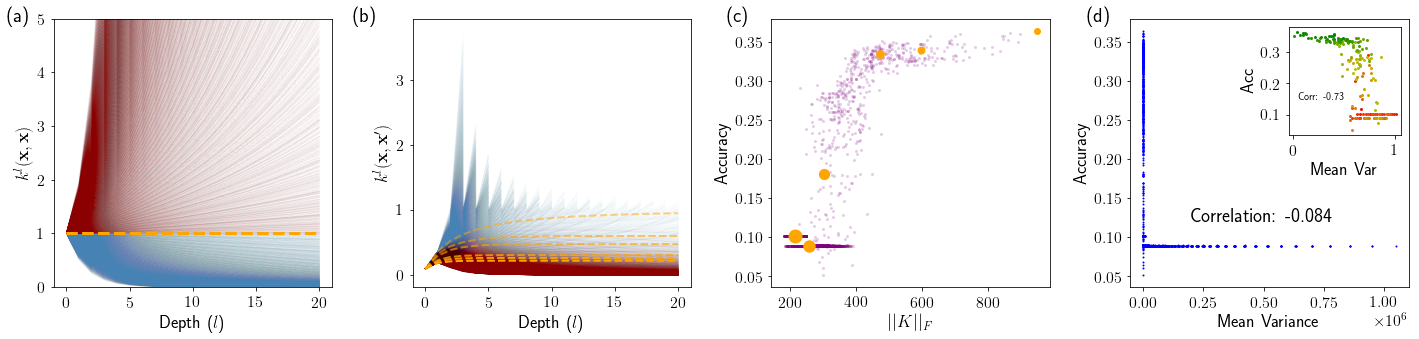

In [3]:
results_cifar = pd.read_csv("results_cifar/results20.csv", header=None)

var = np.array(results_cifar[8])
accs = np.array(results_cifar[7])
weight_var = np.array(results_cifar[2])
mu_2 = np.array(results_cifar[4])
nan_index = np.where(np.isnan(var))[0]
var = np.delete(var, nan_index)
acc = np.delete(np.array(accs), nan_index)
w = np.delete(np.array(weight_var), nan_index)
mu2 = np.delete(np.array(mu_2), nan_index)
corr = np.corrcoef(var,acc)[0, 1]
diff = np.abs(w - 2/mu2) 


fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize=(20, 5))

# Panel 1
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results_cifar/vars/20_' + load_string, encoding='latin1')
            ax1.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results_cifar/vars/20_' + load_string, encoding='latin1')
            ax1.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)   
        if 0.5*w*m == 1.0:
            col = 'orange'
            alpha=1
            lw=3
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results_cifar/vars/20_' + load_string, encoding='latin1')
            ax1.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax1.set_ylim(0, 5)
ax1.set_xlabel(r'Depth ($l$)')
ax1.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x})$')

# Panel 2
eps = 0.0001
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1 and np.abs(w - 2/m) > eps:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results_cifar/corrs/20_' + load_string, encoding='latin1')
            ax2.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1 and np.abs(w - 2/m) > eps:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results_cifar/corrs/20_' + load_string, encoding='latin1')
            ax2.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)       
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if np.abs(w - 2/m) < eps:
            col = 'orange'
            alpha=m/2
            lw=2
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results_cifar/corrs/20_' + load_string, encoding='latin1')
            ax2.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax2.set_xlabel(r'Depth ($l$)')
ax2.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x}^{\prime})$')

# Panel 3
norm = np.array(results_cifar[9])
n = np.delete(np.array(norm), nan_index)
eps = 0.0001
ax3.plot(n[diff > eps], acc[diff > eps], 'ro', c="purple", markersize=3, alpha=0.2)
for no, a, m in zip(n[diff < eps], acc[diff < eps], mu2[diff < eps]):
    ax3.plot(no, a, 'ro', c="orange", markersize=7*m)
ax3.set_xlabel(r'$||K||_F$')
ax3.set_ylabel("Accuracy")

# Panel 4
# set colours
green = Color("green")
colors = list(green.range_to(Color("red"),len(var)))
colors = np.array(colors)[diff.argsort()]

in_axes = inset_axes(ax4,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)

ax4.plot(var, acc, 'ro', c='blue', markersize=2)
ax4.set_xlabel('Mean Variance')
ax4.set_ylabel('Accuracy')
ax4.text(200000, 0.12, 'Correlation: %1.3f' % corr)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

var_crit = var[diff < 0.01]
acc_crit = acc[diff < 0.01]
mu2_crit = mu2[diff < 0.01]
corr = np.corrcoef(var_crit, acc_crit)[0, 1]
green = Color("green")
colors = list(green.range_to(Color("red"),len(mu2_crit)))
colors = np.array(colors)[mu2_crit.argsort()]
for v,a,c in zip(var_crit, acc_crit, colors):
    if len(str(c)) > 5:
        in_axes.plot(v, a, 'ro', c=str(c), markersize=3)
in_axes.text(0.05,0.15, 'Corr: %1.2f' % corr, size=10)
in_axes.set_ylabel('Acc')
in_axes.set_xlabel('Mean Var')

# fig.text(0.03, 0.5, "(e)", fontsize=20)
# fig.text(0.27, 0.5, "(f)", fontsize=20)
# fig.text(0.52, 0.5, "(g)", fontsize=20)
# fig.text(0.77, 0.5, "(h)", fontsize=20)

fig.text(0.01, 0.92, "(a)", fontsize=20)
fig.text(0.25, 0.92, "(b)", fontsize=20)
fig.text(0.51, 0.92, "(c)", fontsize=20)
fig.text(0.76, 0.92, "(d)", fontsize=20)

plt.gcf().tight_layout()
plt.show()